# Worksheet 05

Name:  Katherine Rimey  
UID: U57891497

### Topics

- Cost Functions
- Kmeans

### Cost Function

Solving Data Science problems often starts by defining a metric with which to evaluate solutions were you able to find some. This metric is called a cost function. Data Science then backtracks and tries to find a process / algorithm to find solutions that can optimize for that cost function.

For example suppose you are asked to cluster three points A, B, C into two non-empty clusters. If someone gave you the solution `{A, B}, {C}`, how would you evaluate that this is a good solution?

Notice that because the clusters need to be non-empty and all points must be assigned to a cluster, it must be that two of the three points will be together in one cluster and the third will be alone in the other cluster.

In the above solution, if A and B are closer than A and C, and B and C, then this is a good solution. The smaller the distance between the two points in the same cluster (here A and B), the better the solution. So we can define our cost function to be that distance (between A and B here)!

The algorithm / process would involve clustering together the two closest points and put the third in its own cluster. This process optimizes for that cost function because no other pair of points could have a lower distance (although it could equal it).

### K means

a) (1-dimensional clustering) Walk through Lloyd's algorithm step by step on the following dataset:

`[0, .5, 1.5, 2, 6, 6.5, 7]` (note: each of these are 1-dimensional data points)

Given the initial centroids:

`[0, 2]`

Assign:   
    Centroid 1 (0): [0, .5]  
    Centroid 2 (2): [1.5, 2, 6, 6.5, 7]  
Update:  
    New Centroid 1: (0 + .5) / 2 = 0.25  
    New Centroid 2: (1.5 + 2 + 6 + 6.5 + 7) / 5 = 4.6  
  
Assign:  
    Centroid 1 (0.25): [0, .5, 1.5]  
    Centroid 2 (4.6): [2, 6, 6.5, 7]  
Update:  
    New Centroid 1: (0 + .5 + 1.5) / 3 = 0.6667  
    New Centroid 2: (2 + 6 + 6.5 + 7) / 4 = 5.375  
  
Assign:  
    Centroid 1 (0.6667): [0, .5, 1.5, 2]  
    Centroid 2 (5.375): [6, 6.5, 7]  
Update:  
    New Centroid 1: (0 + .5 + 1.5 + 2) / 4 = 1  
    New Centroid 2: (6 + 6.5 + 7) / 3 = 6.5  
   
Assign:  
    Centroid 1 (1): [0, .5, 1.5, 2]  
    Centroid 2 (6.5): [6, 6.5, 7]  
Update:  
    New Centroid 1: (0 + .5 + 1.5 + 2) / 4 = 1  
    New Centroid 2: (6 + 6.5 + 7) / 3 = 6.5  
  
Centroids didn't change after last iteration so the algorithm has converged, leaving:  
Cluster 1: [0, .5, 1.5, 2] with Centroid at 1  
Cluster 2: [6, 6.5, 7] with Centroid at 6.5   

b) Describe in plain english what the cost function for k means is.

Measures how spread out the data points are within each cluster,  
i.e. how far are the individual members of a group from the center of their group,  
and acts as a measure of how good or bad the clusters are (being closer to the center  
means a lower cost and k means aims to minimize the cost)

c) For the same number of clusters K, why could there be very different solutions to the K means algorithm on a given dataset?

Intitial centroid selection, the order of processing of data, presence of noise and outliers, and  
choice of distance metric are examples of factors that can affect the resulting solutions.


d) Does Lloyd's Algorithm always converge? Why / why not?

Yes, but not necessarily to the global optimum and instead to a to a local optimum.  
Since there's a finite number of steps for convergence (worst case) and we have a non-increading  
cost function, the k means algorithm will always converge.

e) Follow along in class the implementation of Kmeans

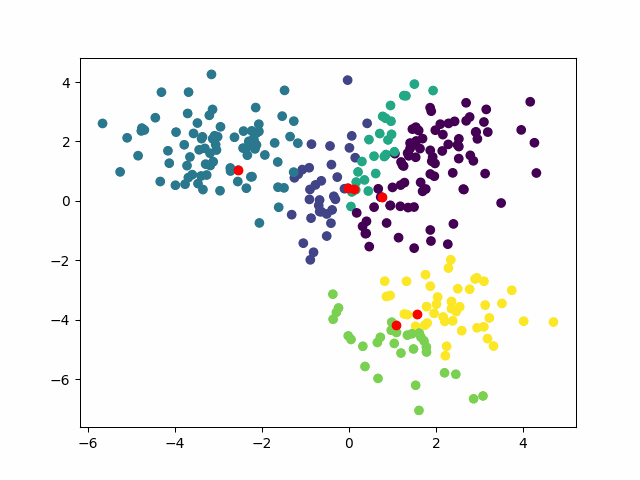

In [9]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from IPython.display import Image

centers = [[0, 0], [2, 2], [-3, 2], [2, -4]]
X, _ = datasets.make_blobs(n_samples=300, centers=centers, cluster_std=1, random_state=0)

class KMeans():

    def __init__(self, data, k):
        self.data = data
        self.k = k
        self.assignment = [-1 for _ in range(len(data))]
        self.snaps = []
    
    def snap(self, centers):
        TEMPFILE = "temp.png"

        fig, ax = plt.subplots()
        ax.scatter(X[:, 0], X[:, 1], c=self.assignment)
        ax.scatter(centers[:,0], centers[:, 1], c='r')
        fig.savefig(TEMPFILE)
        plt.close()
        self.snaps.append(im.fromarray(np.asarray(im.open(TEMPFILE))))


    def lloyds(self, max_iterations=100, tolerance=1e-4):
        indices = np.random.choice(len(self.data), self.k, replace=False)
        centroids = self.data[indices]
        
        for _ in range(max_iterations):
            prev_centroids = centroids.copy()

            for i, point in enumerate(self.data):
                distances = np.linalg.norm(point - centroids, axis=1)
                self.assignment[i] = np.argmin(distances)

            self.snap(centroids)

            for j in range(self.k):
                cluster_points = self.data[np.where(np.array(self.assignment) == j)]
                if len(cluster_points) != 0:
                    centroids[j] = cluster_points.mean(axis=0)

            if np.linalg.norm(centroids - prev_centroids) < tolerance:
                break
            

kmeans = KMeans(X, 6)
kmeans.lloyds()
images = kmeans.snaps

images[0].save(
    'kmeans.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

Image(filename="kmeans.gif")